# Frequent Itemsets and Association Rules

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import fpgrowth, fpmax, association_rules, apriori

## (a)

In [104]:
data = pd.read_csv('./frequent_itemsets_and_association_rules/online_retail.csv', sep=';', decimal=',')
display(data.head())
display(data.info())
print(data.columns)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536370,ALARM CLOCK BAKELIKE PINK,24,01.12.2010 08:45,3.75,12583.0,France
1,536370,ALARM CLOCK BAKELIKE RED,24,01.12.2010 08:45,3.75,12583.0,France
2,536370,ALARM CLOCK BAKELIKE GREEN,12,01.12.2010 08:45,3.75,12583.0,France
3,536370,PANDA AND BUNNIES STICKER SHEET,12,01.12.2010 08:45,0.85,12583.0,France
4,536370,STARS GIFT TAPE,24,01.12.2010 08:45,0.65,12583.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29313 entries, 0 to 29312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      29313 non-null  int64  
 1   Itemname    29313 non-null  object 
 2   Quantity    29313 non-null  int64  
 3   Date        29313 non-null  object 
 4   Price       29313 non-null  float64
 5   CustomerID  29208 non-null  float64
 6   Country     29313 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


None

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')


,index,Itemname,Quantity,Price,sales_val
0,1629,POSTAGE,2830,22170.50,59489.50
1,1739,REGENCY CAKESTAND 3 TIER,1660,2295.90,18961.80
2,1643,RABBIT NIGHT LIGHT,9899,253.10,18836.00
3,1334,Manual,28,16866.61,16882.86
4,1819,ROUND SNACK BOXES SET OF4 WOODLAND,5627,775.65,15217.25


<Axes: xlabel='sales_val', ylabel='Country'>

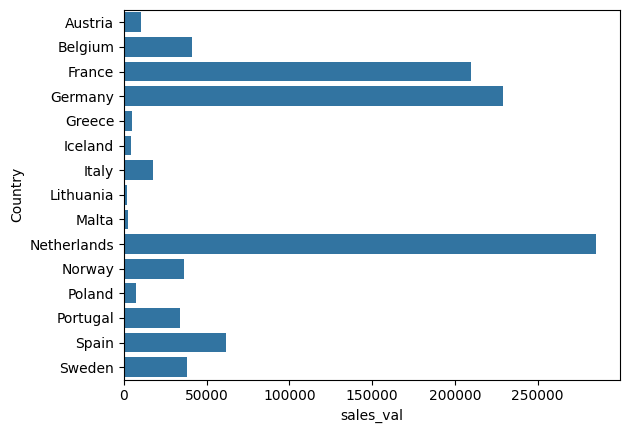

In [88]:
# Your code here
sales_val = data.copy()

sales_val["sales_val"] = data["Quantity"]*data["Price"]
sorted_sales = sales_val.groupby("Itemname").sum().reset_index()
sorted_sales =sorted_sales.sort_values("sales_val",ascending=False)
# drop unnecessary cols
sorted_sales.drop(["Country","Date","BillNo","CustomerID"],axis=1,inplace=True)
sorted_sales.reset_index(inplace=True)
display(sorted_sales.head())


df_by_country  =sales_val.groupby("Country").sum().reset_index()
sns.barplot(df_by_country,x="sales_val",y="Country",orient="h")



## (b)

In [76]:
# Create a transaction for each BillNo
transactions = data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0).astype(bool)
transaction_attributes = data.groupby('BillNo')[['Date', 'CustomerID', 'Country']].first()
display(transactions.head())
display(transaction_attributes.head())

n_transactions = transactions.shape[0]







Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536403,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Date,CustomerID,Country
BillNo,,,
536370,01.12.2010 08:45,12583.0,France
536403,01.12.2010 11:27,12791.0,Netherlands
536527,01.12.2010 13:04,12662.0,Germany
536532,01.12.2010 13:24,12433.0,Norway
536840,02.12.2010 18:27,12738.0,Germany


the number of transactions in the dataset is given by the number of different BillNo: 1357


,Itemname,count,support
0,POSTAGE,983,0.033671
1,ROUND SNACK BOXES SET OF4 WOODLAND,266,0.009111
2,REGENCY CAKESTAND 3 TIER,186,0.006371
3,PLASTERS IN TIN WOODLAND ANIMALS,184,0.006303
4,ROUND SNACK BOXES SET OF 4 FRUITS,166,0.005686
...,...,...,...
2484,PAPERWEIGHT HOME SWEET HOME,1,0.000034
2485,ANTIQUE SILVER TEA GLASS ENGRAVED,1,0.000034
2486,PARTY CONES CARNIVAL ASSORTED,1,0.000034
2487,PEACH KNITTED HEN,1,0.000034


                             Itemname  count   support
0                             POSTAGE    983  0.033671
1  ROUND SNACK BOXES SET OF4 WOODLAND    266  0.009111
2            REGENCY CAKESTAND 3 TIER    186  0.006371
the three most common items are : POSTAGE support: 0.033671302322395014
the three most common items are : ROUND SNACK BOXES SET OF4 WOODLAND support: 0.009111461259162842
the three most common items are : REGENCY CAKESTAND 3 TIER support: 0.006371172158662739


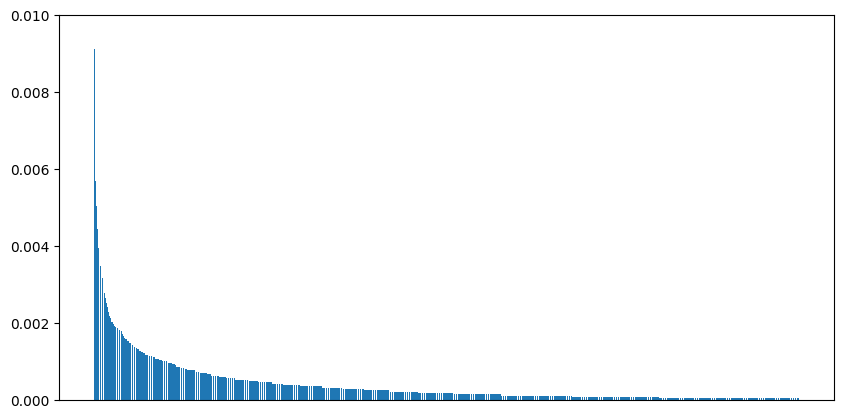

In [77]:
# Your code here
num_transactions = len(data["BillNo"].unique())
print("the number of transactions in the dataset is given by the number of different BillNo: %s"% num_transactions)
frequencies = transactions.sum(axis=0)
frequencies.sort_values(axis=0,ascending=False, inplace=True,)
frequencies = frequencies.reset_index()
frequencies.columns = ["Itemname","count"]

frequencies["support"] = frequencies["count"]/(sum(frequencies["count"]))
display(frequencies)
print(frequencies[frequencies["count"]>= frequencies["count"][2]])
plt.figure(figsize=(10, 5))
df_plot = frequencies[1:].sort_values("support",axis=0,ascending=False)
# sns.barplot(df_plot,y="support",x = "Itemname",)
plt.bar(df_plot["Itemname"],df_plot["support"])
plt.xticks([])
plt.ylim(0,0.01)
for i in range(3):
    print("the three most common items are : %s support: %s" % (frequencies["Itemname"][i], frequencies["support"][i]))

## (c)

## (d)

In [155]:
# Your code here
frequent_itemsets = apriori(transactions, min_support=0.01, use_colnames=True)
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(len)
frequent_itemsets = frequent_itemsets[frequent_itemsets['length']>2].reset_index()
most_freq = frequent_itemsets.sort_values("support",axis=0,ascending=False)[:3].reset_index()

for i in range(len(most_freq)):
    
    print("itemset: %s support: %s" % (most_freq["itemsets"][i], most_freq["support"][i]))





itemset: frozenset({'POSTAGE', 'ROUND SNACK BOXES SET OF 4 FRUITS', 'ROUND SNACK BOXES SET OF4 WOODLAND'}) support: 0.08032424465733234
itemset: frozenset({'POSTAGE', 'PLASTERS IN TIN WOODLAND ANIMALS', 'PLASTERS IN TIN CIRCUS PARADE'}) support: 0.05379513633014001
itemset: frozenset({'POSTAGE', 'PLASTERS IN TIN SPACEBOY', 'PLASTERS IN TIN WOODLAND ANIMALS'}) support: 0.05084745762711865


## (e)

In [173]:

# Your code here
def check_subset(itemset,list_of_itemsets):
    for check_set in list_of_itemsets:

        if itemset.issubset(check_set) and itemset != check_set:
            return False
        else:
            return True
max_itemsets = frequent_itemsets.copy()
max_itemsets["is_max"] = max_itemsets["itemsets"].apply(
    lambda itemset: check_subset(itemset,max_itemsets["itemsets"])
    )
max_itemsets[max_itemsets["is_max"]].reset_index()
max_itemsets.sort_values("support",axis=0,ascending=False).reset_index()
max_itemsets[:3]
 

# for i  range(len(max_itemsets)):
    
#     print("itemset: %s support: %s" % (max_itemsets["itemsets"][i], max_itemsets["support"][i]))in

,index,support,itemsets,length,is_max
0,2375,0.010317,"(POSTAGE, 3 PIECE SPACEBOY COOKIE CUTTER SET, ...",3,True
1,2376,0.010317,"(6 RIBBONS RUSTIC CHARM, POSTAGE, CHOCOLATE BO...",3,True
2,2377,0.015475,"(6 RIBBONS RUSTIC CHARM, POSTAGE, REGENCY CAKE...",3,True


## (f)

In [ ]:
# Your code here

## (g)

In [ ]:
# Your code here

## (h)

In [ ]:
# Your code here

## (i)

In [ ]:
# Your code here

## (j)

In [ ]:
# Your code here